# 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。



[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


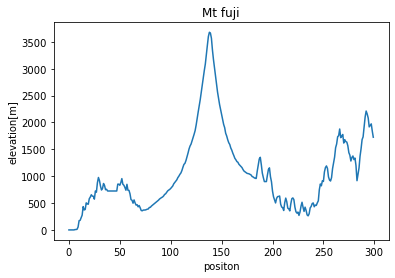

array([   0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    6.62,
          7.21,   12.2 ,   54.41,  171.56,  177.84,  228.21,  275.38,
        433.76,  371.74,  380.06,  503.4 ,  485.39,  477.82,  580.5 ,
        610.92,  654.96,  628.22,  626.64,  572.55,  723.95,  701.94,
        879.47,  976.17,  919.16,  817.  ,  743.06,  770.92,  864.06,
        826.52,  748.39,  756.11,  724.5 ,  724.5 ,  724.5 ,  724.5 ,
        724.5 ,  724.5 ,  724.5 ,  724.5 ,  724.5 ,  724.5 ,  852.18,
        851.36,  831.  ,  880.44,  955.14,  849.52,  831.6 ,  790.01,
        738.97,  848.83,  738.3 ,  736.48,  672.24,  564.02,  552.23,
        497.41,  558.28,  503.02,  462.33,  469.66,  429.49,  454.21,
        412.27,  362.29,  355.68,  368.91,  371.04,  371.19,  377.62,
        386.64,  390.14,  418.41,  420.6 ,  443.  ,  458.66,  471.82,
        488.4 ,  505.1 ,  519.54,  536.54,  553.64,  575.07,  588.99,
        602.36,  613.04,  631.71,  660.43,  672.36,  700.15,  725.72,
        741.17,  753

In [2]:
# データをDL
import numpy as np
csv_path = "/Users/yuki.tatsuoka/diveintocodeの解答例/mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji[130:140])

#図式化する
import matplotlib.pyplot as plt

plt.title("Mt fuji")
plt.xlabel("positon")
plt.ylabel("elevation[m]")
plt.plot(fuji[:, 0], fuji[:, 3])
plt.show()
fuji[:,3]

# 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。


「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。


勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

$$
勾配＝\frac{yの変化量}{xの変化量} 
$$


In [32]:
# 「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数
def gradient_cheker(elevations, position):
    return elevations[position] - elevations[position -1]
gradient_cheker(fuji[:, 3], position=136)


168.35000000000036

# 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。


数式で表すと 「移動先の地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。


「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。
α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。


《実装上の注意》


上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。


Python tutorial エラーと例外


《ハイパーパラメータとは》


機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [70]:
# 計算式をそのまま使う
def position_cheker(elevations, position, alpha):
    gradient = gradient_cheker(elevations, position) 
    move_point = round(position - alpha * gradient).astype(np.int)
    move_point = np.maximum(1, move_point)
    next_position = np.minimum(len(elevations)-1, move_point) 
    return move_point

position_cheker(elevations=fuji[:, 3], position=136, alpha=0.2)

102

# 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。


最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。


《実装上の注意》


問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。



In [69]:
# 問題23の関数を統合する
# 今回の山を降りきった基準は勾配が-になれば終了とする
def position_cheker2(elevations, position, alpha):
    move_point_list = [position]
    while move_point_list[-1] not in move_point_list[:-1]:
        move_point_list.append(position_cheker(elevations, move_point_list[-1], alpha=alpha))
    return move_point_list

elevations = fuji[:, 3]
position = 136

position_cheker2(elevations, position, alpha=0.2)




[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75, 75]

# 【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。


《可視化例》



断面図の中に移動した地点を点で表示する
繰り返し毎の標高や勾配を折れ線グラフにする


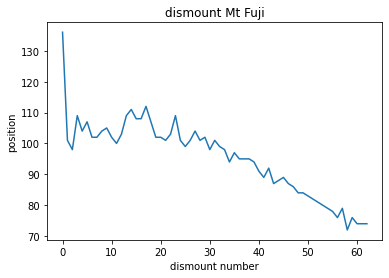

In [64]:
plt.title("dismount Mt Fuji")
plt.xlabel("dismount number")
plt.ylabel("position")
plt.plot(move_point_list)
plt.show()

# 【問題6】初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。


《初期値とは》


今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。



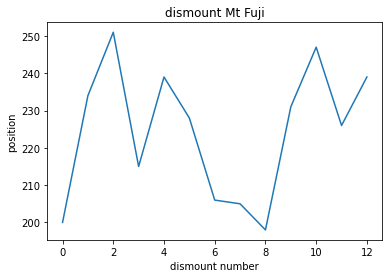

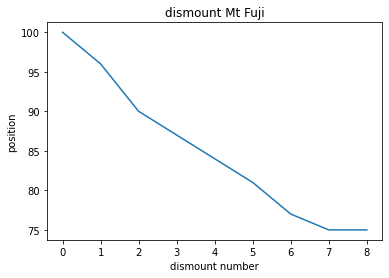

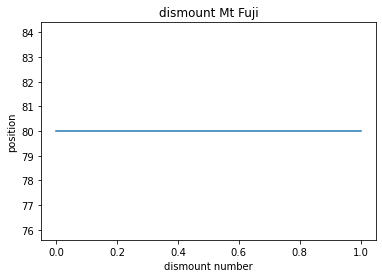

In [65]:
elevations = fuji[:, 3]
position = 200

move_point_list = position_cheker2(elevations, position,alpha=0.2)

# 図1
plt.title("dismount Mt Fuji")
plt.xlabel("dismount number")
plt.ylabel("position")
plt.plot(move_point_list)
plt.show()

elevations = fuji[:, 3]
position = 100       
move_point_list = position_cheker2(elevations, position,alpha=0.2)


# 図2
plt.title("dismount Mt Fuji")
plt.xlabel("dismount number")
plt.ylabel("position")
plt.plot(move_point_list)
plt.show()

        

elevations = fuji[:, 3]
position = 80        
move_point_list = position_cheker2(elevations, position,alpha=0.2)


# 図3
plt.title("dismount Mt Fuji")
plt.xlabel("dismount number")
plt.ylabel("position")
plt.plot(move_point_list)
plt.show()

            

# 【問題7】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ $\alpha$ を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

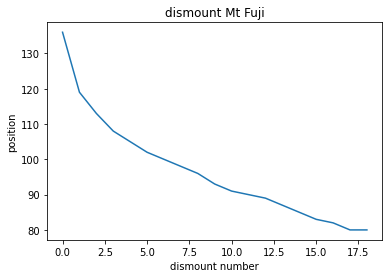

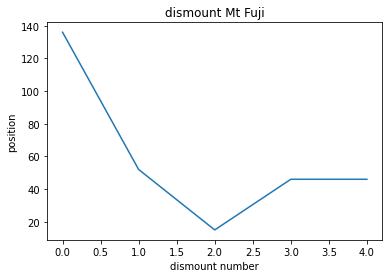

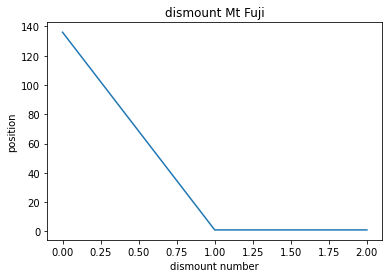

In [71]:
# 今いる地点136でalphaを変動させる
elevations = fuji[:, 3]
position = 136
move_point_list = position_cheker2(elevations, position, alpha=0.1)

# 図1
plt.title("dismount Mt Fuji")
plt.xlabel("dismount number")
plt.ylabel("position")
plt.plot(move_point_list)
plt.show()


elevations = fuji[:, 3]
position = 136
move_point_list = position_cheker2(elevations, position, alpha=0.5)

# 図2
plt.title("dismount Mt Fuji")
plt.xlabel("dismount number")
plt.ylabel("position")
plt.plot(move_point_list)
plt.show()


elevations = fuji[:, 3]
position = 136
move_point_list = position_cheker2(elevations, position, alpha=1)        

# 図3
plt.title("dismount Mt Fuji")
plt.xlabel("dismount number")
plt.ylabel("position")
plt.plot(move_point_list)
plt.show()

            